## Desafío - Boosting Classifiers



<br>
<div class="alert alert-block alert-success">

<b>Nombre:</b> María Eugenia Valenzuela- Rene Navarro- Juan Oyarce.

<b>Generación:</b> G2.

<b>Profesor:</b> Gabriel Tamayo L.

</div>


* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.


### Descripción
* Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una compañia de telecomunicaciones. El archivo contiene 3333 registros y 20 atributos. El vector objetivo a modelar es la tasa de rotación entre los clientes de una compañia de telecomunicaciones churn. Los atributos existentes hacen referencia a características de la cuenta de cada cliente. Lista de atributos:
    * State: Estado de Estados Unidos
    * Account Length: Tiempo en que la cuenta ha sido activada
    * Area Code: código de área.
    * international plan: Plan internacional activiado
    * voice mail plan: Plan de mensajes de voz activado
    * number_vmail_messages: Cantidad de mensajes de voz.
    * total_day_minutes: Cantidad de minutos ocupados en la mañana.
    * total_day_calls: Cantidad de llamadas realizadas en la mañana.
    * total_day_charge: Cobros realizados en la mañana.
    * total_eve_minutes: Cantidad de minutos ocupados en la tarde.
    * total_eve_calls: Cantidad de llamadas realizadas en la tarde.
    * total_eve_charge: Cobros realizados en la tarde.
    * total_night_calls: Cantidad de llamadas realizadas en la noche.
    * tota_night_minutes: Cantidad de minutos ocupados en la noche.
    * total_night_charge: Cobros realizados en la noche.
    * total_intl_minutes: Cantidad de minutos ocupados en llamadas internacionales.
    * total_intl_calls: Cantidad de llamadas internacionales realizadas.
    * total_intl_charge: Cobros realizados por llamadas internacionales.
    * churn: 1 si el cliente se cambió de compañia, 0 de los contrario.

Los datos provienen del paquete AppliedPreditiveModeling de R .

### Ejercicio 1: Preprocesamiento

* Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.
* Para las variables categóricas, recodifíquelas en variables binarias.

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lec9_graphs as afx
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  accuracy_score, mean_squared_error, roc_curve, auc, classification_report, median_absolute_error,r2_score

import operator
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
 

In [44]:
df = pd.read_csv('churn_train.csv').drop(columns='Unnamed: 0')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


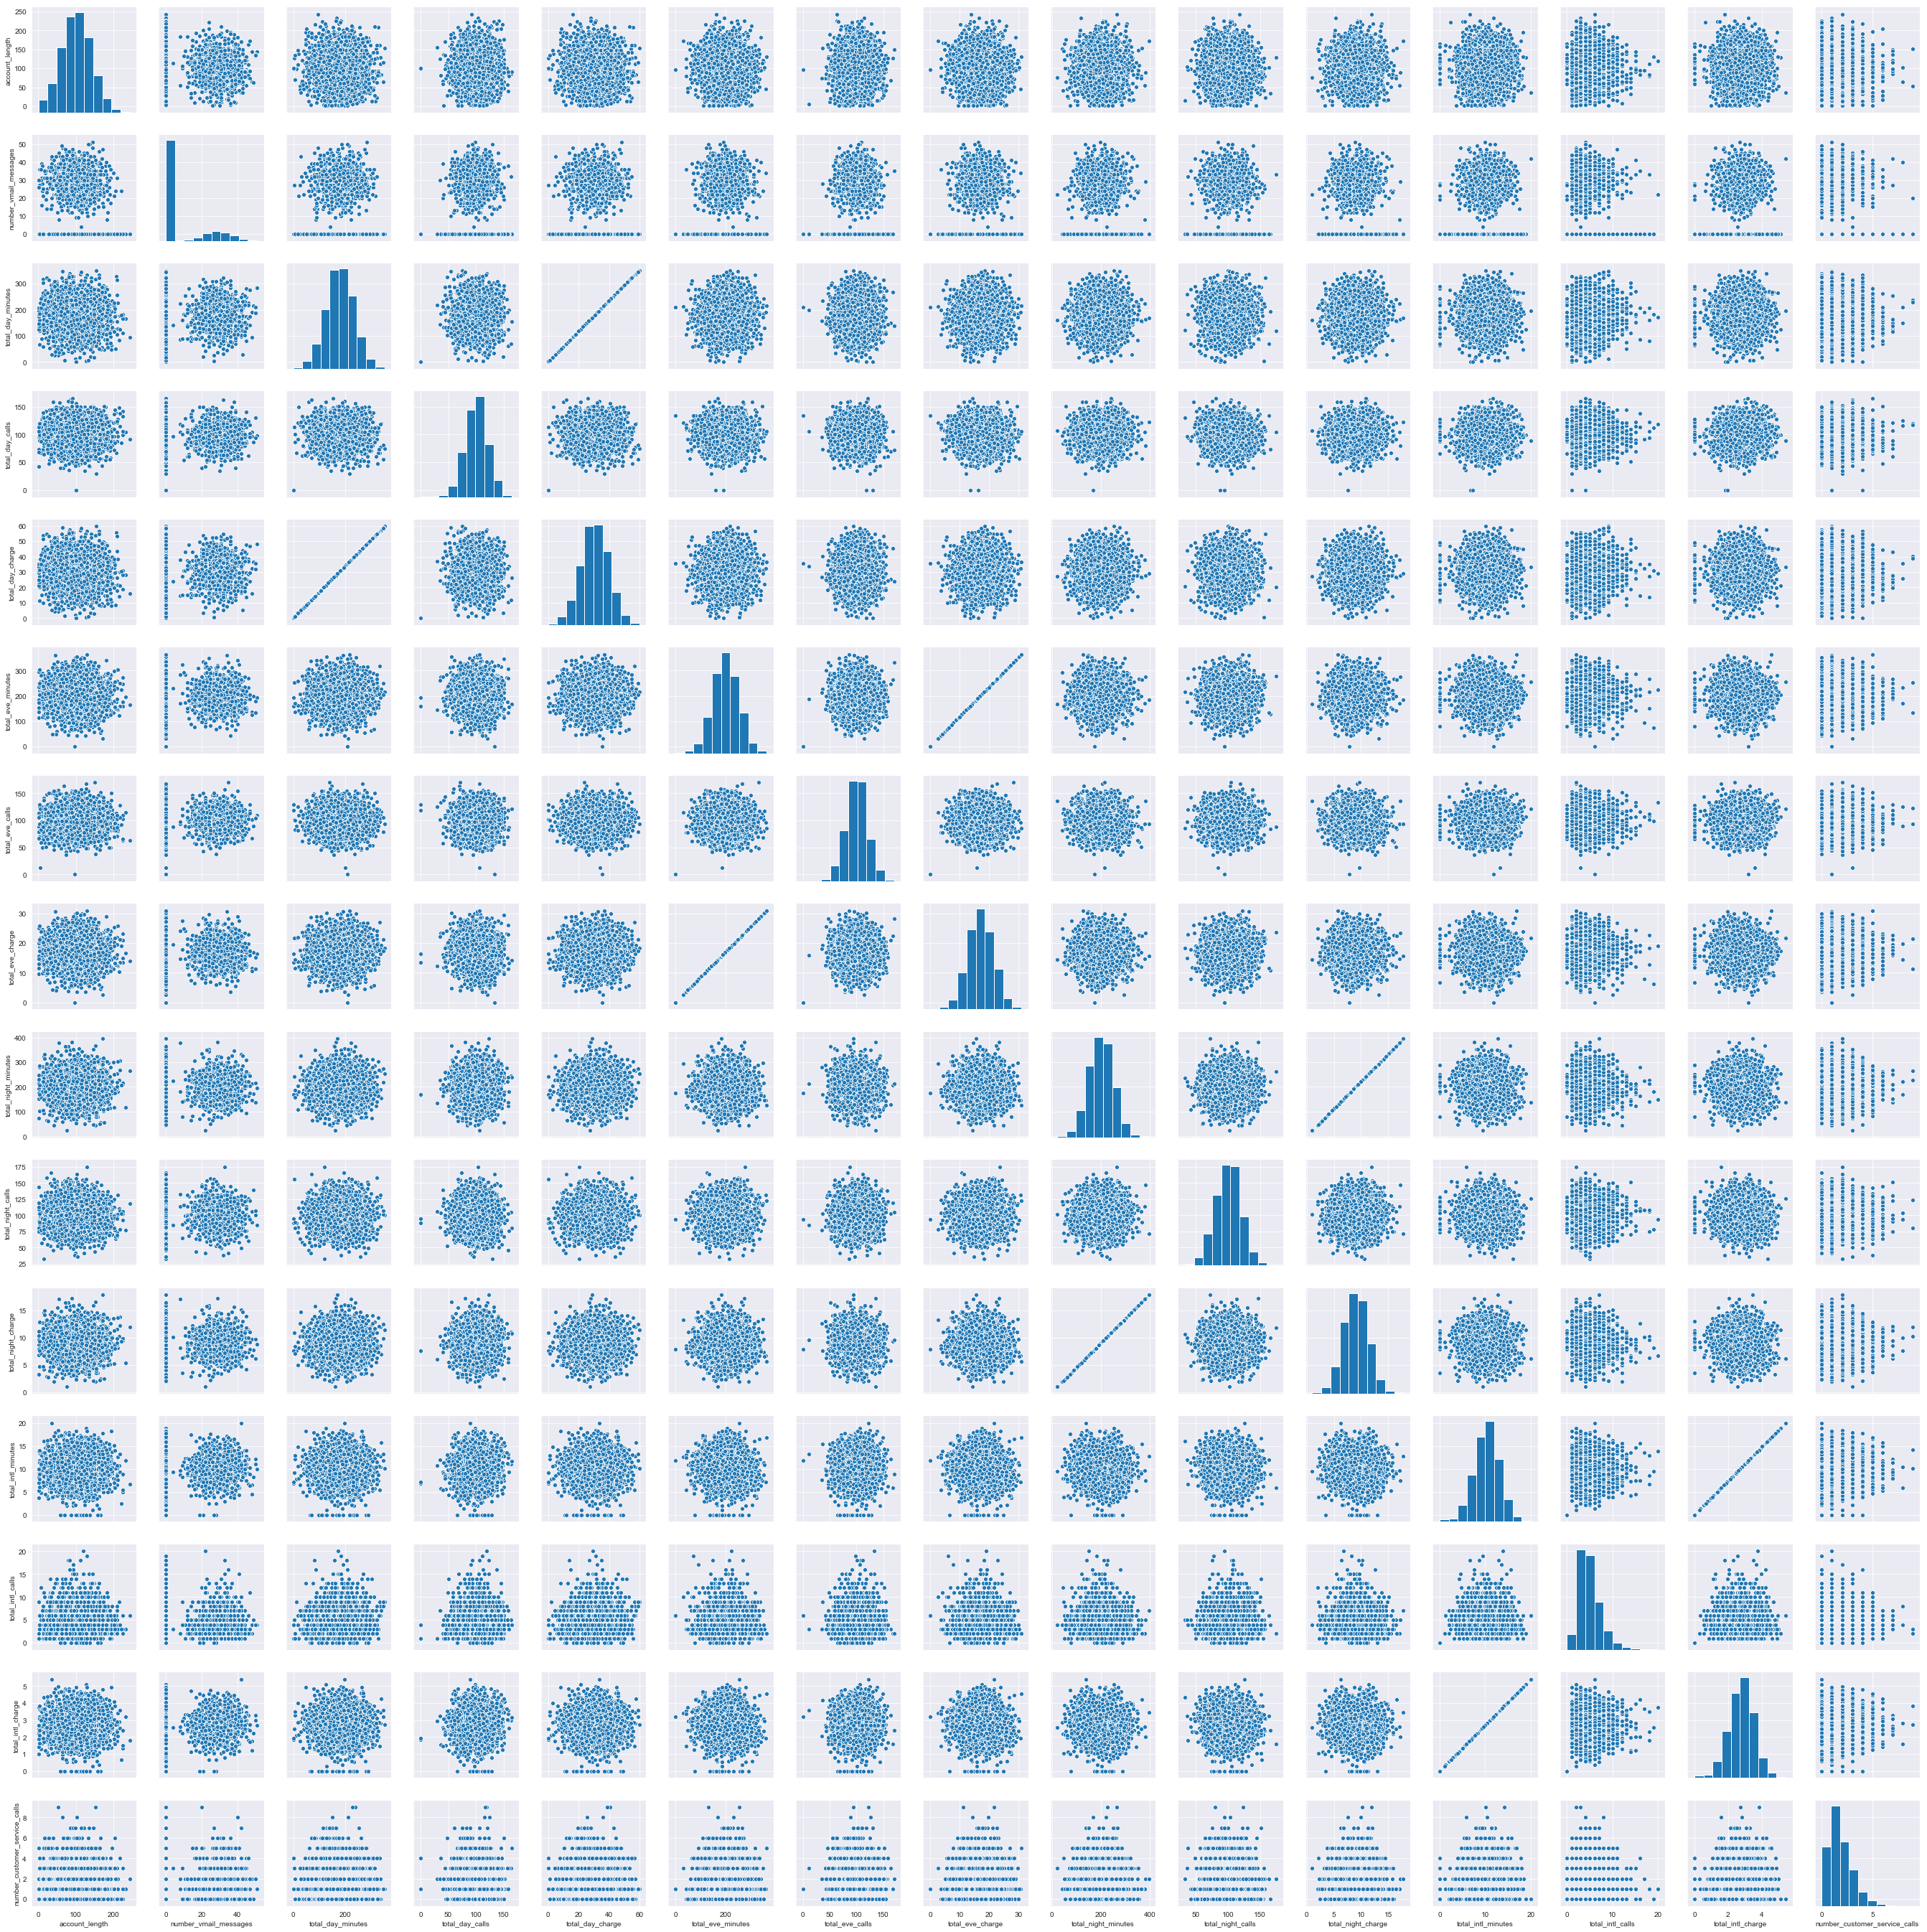

In [3]:

sns.pairplot(df)

- El pairplot muestra que los histogramas de las variables numéricas se ajustan a distribuciones normales, en cuanto a las correlaciones parciales, no se aprecian correlaciones líneales contundentes, sino más bien nubes de dispersión, esto debido a la varianza de los datos.

In [42]:
def descriptives_plot(dataframe):
    """
    Descripción: Esta función recibe un data set y descrimina entre el tipo de variable para gráficar un histograma de frecuencias
    en el caso de ser una variable numérica (int 64) o devuelve un gráfico de barras con las frecuencias de las variables categóricas (Objetc: String)
    
    Input:DataFrame: dataframe de Pandas con las variables a analizar
    
    Outpout: Imprime como salidas los histogramas de frecuencia o los gráficos de barras de frecuencias
    """
    for i in dataframe.columns:
        if dataframe[i].dtype == 'O':

            dataframe[i].value_counts().plot(kind='bar',title='Frecuencias de: '+i)
            plt.xlabel("")
            plt.rcParams["figure.figsize"] = (6, 6) 
            plt.tight_layout()
            plt.show()
            print('\n')    
        else:
            plt.hist(dataframe[i], alpha=1, color='gray', label=i, normed=True)
            plt.axvline(dataframe[i].mean(), lw=3, color='tomato', label='Media')
            plt.axvline(dataframe[i].median(), lw=3, color='green', label='Mediana')
            plt.title('Histograma: '+ i)
            plt.legend()
            plt.show()
            print('\n')
           


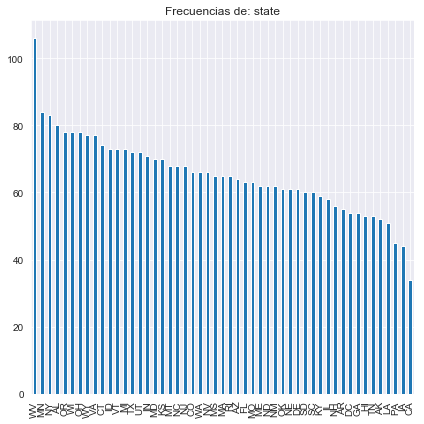

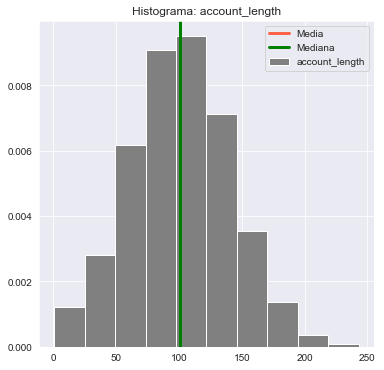

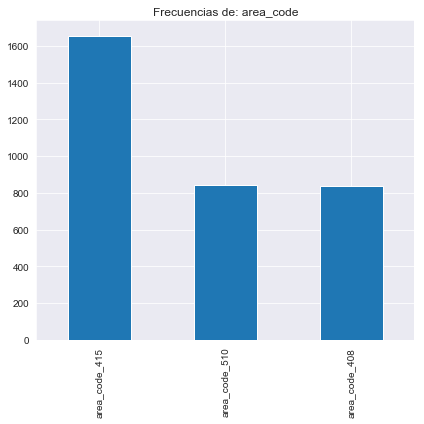

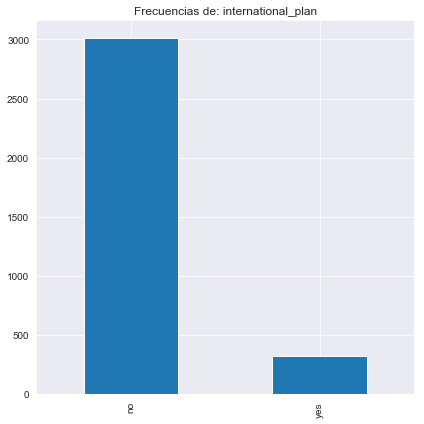

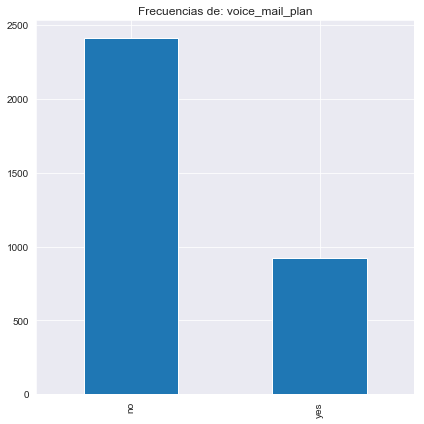

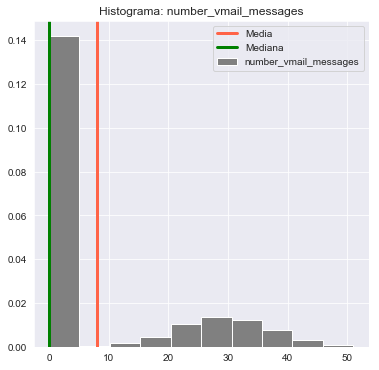

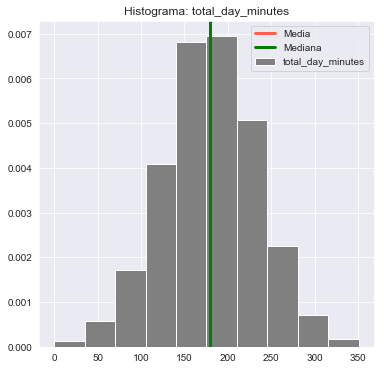

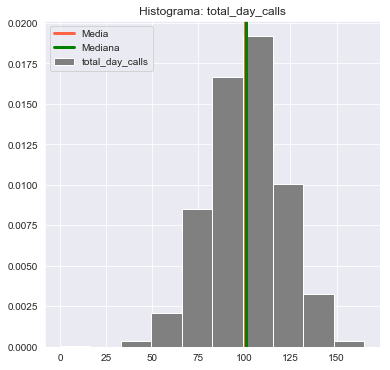

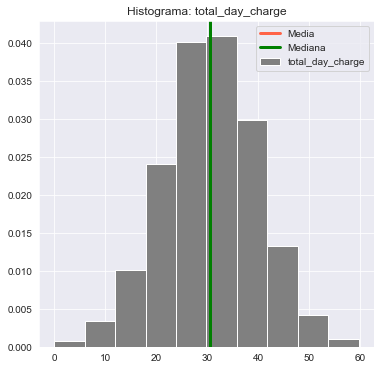

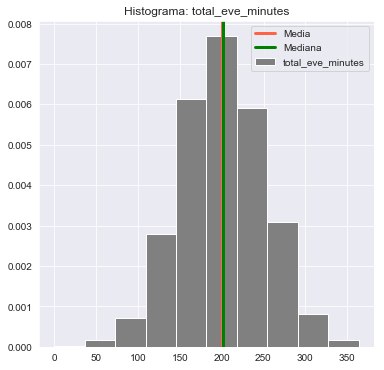

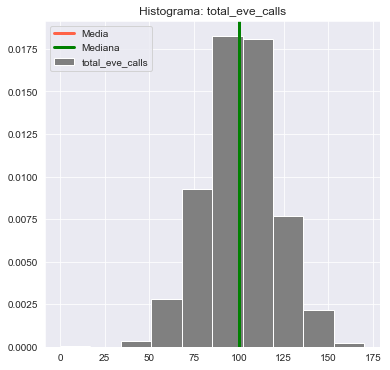

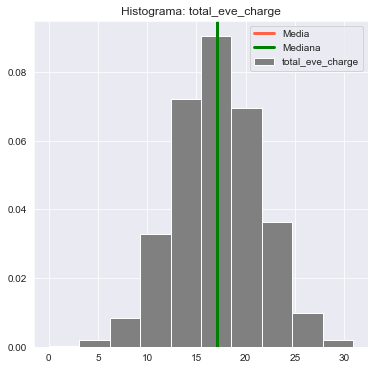

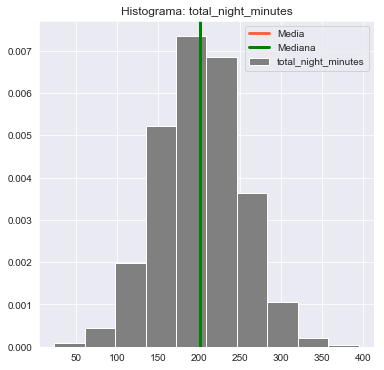

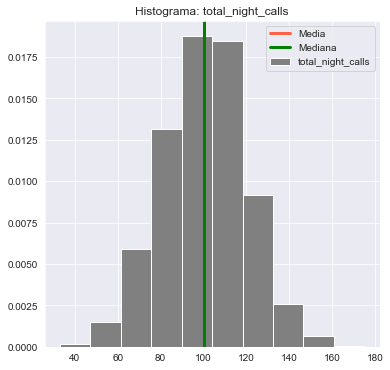

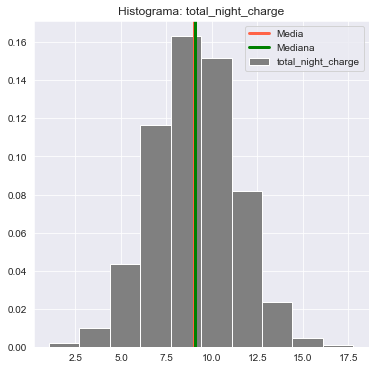

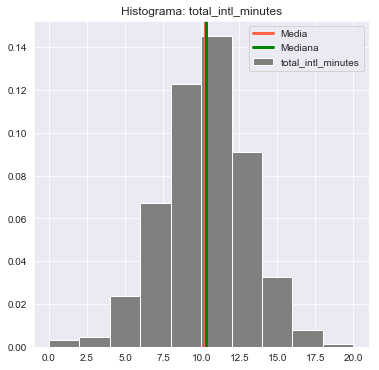

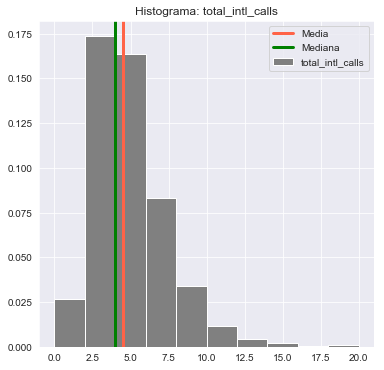

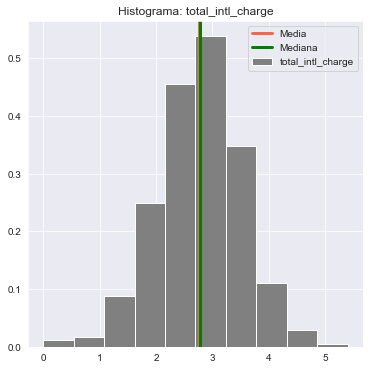

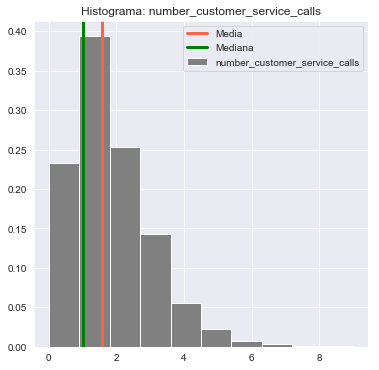

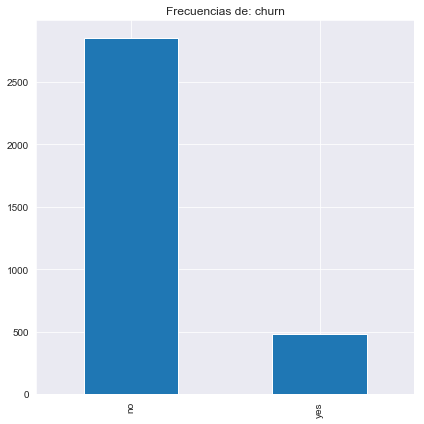

In [45]:
descriptives_plot(df)

- Se aprecia que la mayoría de las variables, en apariencia, presentan histogramas que permiten asimilarlas como distribuciones normales, a excepción de 'number_costumer_services_call', number_vmail_messages y total_inti_calls, cuyo histograma presenta una distribución más heterógenea. Las variables categóricas, presentan diferentes frecuencias relativas, en especial la variable objetivo 'churn'  presenta un desbalanceo de clases, donde predomina la clase 'no', es decir aquellas personas que se conservan con un porcentaje cercano al 86%, los clientes que rotan, es decir la clase 'si', corresponde al otro '14%', este hecho en la distribución podría alterar los modelos de clasificación.

In [6]:

#generación de dummies
dummies=[]
for i in df.columns:
    if df[i].dtypes == 'object':
        dummies.append(i)
for i in dummies:
    df = pd.concat([df, pd.get_dummies(df[i], drop_first=True, prefix=i+'_')], axis=1)
    df.drop(i, axis = 1, inplace = True)

In [7]:
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state__VT,state__WA,state__WI,state__WV,state__WY,area_code__area_code_415,area_code__area_code_510,international_plan__yes,voice_mail_plan__yes,churn__yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,1,0,0,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,1,0,0,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,1,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,1,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,1,0,1,0,0


### Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

* Entrene los clasificadores AdaBoost y Gradient Boosting, para mejorar su capacidad predictiva implemente una búsqueda de grilla con las siguientes especificaciones:

| Modelo   |      Grilla      |
|----------|:-------------:|
| AdaBoostClassifier |  {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000]} |  
| GradientBoostingClassifier |    {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000],'subsample': [0.1,0.5,0.9]}   |   
 


* Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.
* Reporte las métricas para los mejores modelos.

In [8]:
# generación sub set de entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'account_length':'voice_mail_plan__yes'],
df['churn__yes'], test_size=.33, random_state=1986)


In [9]:
# grilla hiperparamétros

param_grid_ada = {'n_estimators': [50, 100, 500, 1000, 2000],
'learning_rate': [0.01, 0.1, 0.5]}

param_grid_gboost = {'n_estimators': [50, 100, 500, 1000, 2000],
'learning_rate': [0.01, 0.1,0.5],
'subsample': [0.1,0.5,0.9] 
}

In [10]:
# Entrenamos el decision stump
%time
decision_stump = DecisionTreeClassifier(max_depth=1,
random_state=11238).fit(X_train, y_train)



Wall time: 0 ns


In [11]:
# Entrenamos AdaBoost
%time
adaboost_classifier = GridSearchCV(AdaBoostClassifier(),
param_grid = param_grid_ada,
cv=5, n_jobs=-1).fit(X_train, y_train)


Wall time: 0 ns


In [12]:
# Entrenamos GradienteBoost
%time
gb_grid = GridSearchCV(GradientBoostingClassifier(),
param_grid = param_grid_gboost,
cv=5, n_jobs=-1).fit(X_train, y_train)


Wall time: 0 ns


In [13]:
gb_grid_best= gb_grid.best_estimator_

In [14]:
gb_grid_best

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.9, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [15]:
# Entrenamos XGBoost (tiene problemas crushea python; los resultados de clasificación son muy levemente superiores a GBoost)

#gbx_grid = GridSearchCV(XGBClassifier(),
#param_grid = param_grid_gboost,
#cv=5).fit(X_train, y_train)


In [16]:
# guardamos las predicciones de ambos modelos
decision_stump_y_hat = decision_stump.predict(X_test)
adaboost_y_hat = adaboost_classifier.predict(X_test)
gb_grid_y_hat = gb_grid.predict(X_test)


In [17]:
print('Árbol de clasificación de prueba \n',classification_report(y_test, decision_stump_y_hat, digits=3))
print('Ensamble AdaBoost \n',classification_report(y_test, adaboost_y_hat, digits=3))
print('Ensamble GradientBoost \n',classification_report(y_test, gb_grid_y_hat, digits=3))


Árbol de clasificación de prueba 
               precision    recall  f1-score   support

           0      0.878     0.965     0.919       935
           1      0.548     0.242     0.336       165

   micro avg      0.856     0.856     0.856      1100
   macro avg      0.713     0.604     0.628      1100
weighted avg      0.829     0.856     0.832      1100

Ensamble AdaBoost 
               precision    recall  f1-score   support

           0      0.888     0.968     0.926       935
           1      0.630     0.309     0.415       165

   micro avg      0.869     0.869     0.869      1100
   macro avg      0.759     0.639     0.670      1100
weighted avg      0.849     0.869     0.850      1100

Ensamble GradientBoost 
               precision    recall  f1-score   support

           0      0.958     0.986     0.972       935
           1      0.906     0.758     0.825       165

   micro avg      0.952     0.952     0.952      1100
   macro avg      0.932     0.872     0.899     

- Se aprecia que el modelo que tiene mejor desempeño corresponde al ensamble GradientBoost, puesto que logra clasificar mejor las clases 1 - 0 que sus contrapartes Adaboost y árbol de clasificación de prueba, presentando un valor F1-Score promedio de 0.95 aprox. lo que lo convierte en un modelo muy bueno, a pesar del desbalanceo de clases original. En otro computador se entrenó el modelo XGBoost, para verificar si éste presentaba alguna mejora significativa en relación a GBoost, los resultados fueron muy ligeramente mejores, aunque lo que si mejoró fue el tiempo de computo del modelo. 

### Ejercicio 3: Principales factores asociados

* Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.

<div class="alert alert-block alert-warning">
<b>Tips:</b> 
    
   - Pueden implementar la función plot_importance que se encuentra en la lectura de Bagging y Random Forest.

</div>


In [18]:
def plot_roc(model, y_true, X_test, model_label=None):
    """TODO: Docstring for plot_roc.

    :model: TODO
    :y_true: TODO
    :X_test: TODO
    :model_label: TODO
    :returns: TODO

    """
    tmp_y_pred = model.predict_proba(X_test)[:, 1]
    false_positive_rates, true_positive_rates, _ = roc_curve(y_test, tmp_y_pred)
    store_auc = auc(false_positive_rates, true_positive_rates)
    if model_label is not None:
        tmp_label = "{}: {}".format(model_label, round(store_auc,3))
    else:
        tmp_label = None
    plt.plot(false_positive_rates, true_positive_rates, label=tmp_label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

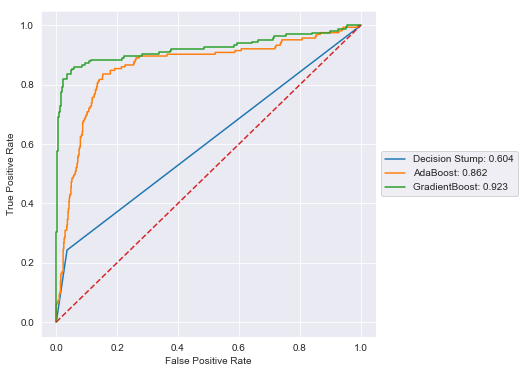

In [19]:
# gráfica de curvas ROC
plot_roc(model=decision_stump, y_true= y_test, X_test=X_test,model_label = "Decision Stump")
plot_roc(model=adaboost_classifier, y_true= y_test,X_test=X_test,model_label="AdaBoost")
plot_roc(model=gb_grid,y_true= y_test, X_test=X_test, model_label="GradientBoost")
plt.plot([0, 1], ls="--")
plt.legend(loc='center left', bbox_to_anchor=(1, .5));

- Las curvas ROC muestran que efectivamente el modelo GradientBoost clasifica mejor que el resto de  los modelos competidores, seguido por AdaBoost y finalmente, el árbol de decisión de prueba.

In [20]:
variables= list(df.columns)
variables.remove('churn__yes')


In [21]:
def plot_importance(fit_model, feat_names):
   """TODO: Docstring for plot_importance.
   :fit_model: TODO
   :: TODO
   :returns: TODO
   """
   tmp_importance = fit_model.feature_importances_
   sort_importance = np.argsort(tmp_importance)[::-1]
   names = [feat_names[i] for i in sort_importance]
   plt.title("Feature importance")
   plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
   plt.yticks(range(len(feat_names)), names, rotation=0)

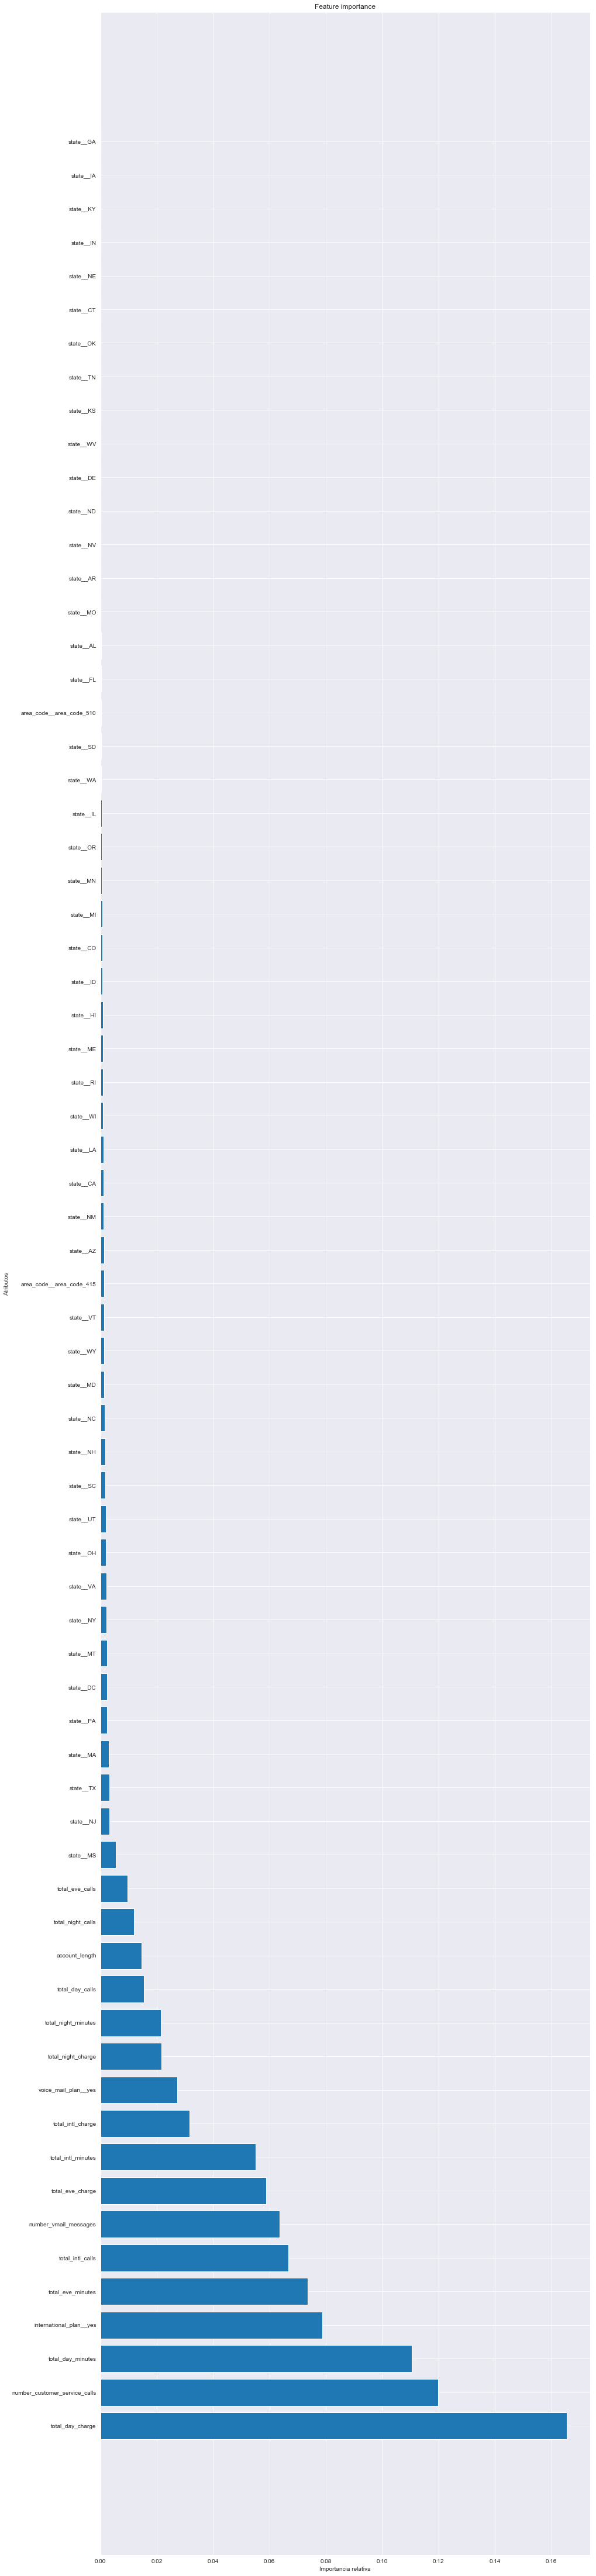

In [22]:
plt.figure(figsize=(15,80))
plot_importance(gb_grid_best, variables)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

- El gráfico ilustra los atributos más importantes al momento de clasificar la variable objetiva, en ese sentido el total de minutos diarios, la carga total diaria, el número de llamadas de servicio personalizadas, el total de minutos y la presencia de un plan internacional, son los atributos más relevantes para clasificar la permanencia o fuga de clientes en  la empresa.


### Ejercicio 4: Probabilidad de fuga
* El gerente general necesita saber en qué estados hay una mayor probabilidad de fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad de fuga.
* Implemente el modelo predictivo con el archivo churn_test.csv .
* Recuerde que para obtener la probabilidad de clase, debe utilizar la función predict_proba del modelo.

In [23]:
# Lectura de archivo
df_state = pd.read_csv('churn_test.csv').drop(columns='Unnamed: 0')
df_state.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [24]:

#generación de dummies del nuevo dataframe
dummies=[]
for i in df_state.columns:
    if df_state[i].dtypes == 'object':
        dummies.append(i)
for i in dummies:
    df_state = pd.concat([df_state, pd.get_dummies(df_state[i], drop_first=True, prefix=i+'_')], axis=1)
    df_state.drop(i, axis = 1, inplace = True)

In [25]:
#variable de testeo

X_test_2=df_state.drop(columns='churn__yes')

In [26]:
#Predicciones del modelo refactorizado

preds = gb_grid_best.predict_proba(X_test_2).round(2)
df_state["pp_fuga"] = [i[1] for i in preds]   # compresión de lista para extraer la posición de la tupla que aporta la probabilidad de clasificación de fuga

In [27]:
# Nueva carga del dataframe no binarizado
df_state_2 = pd.read_csv('churn_test.csv').drop(columns='Unnamed: 0')
df_state_2["pp_fuga"] =df_state["pp_fuga"]

In [28]:
# Filtro para la probabilidad de fuga cuyos valores sean mayor a 0.5 y frecuencia de los 
df_state_2[df_state_2["pp_fuga"]>0.5].state.value_counts('%')*100

NJ    6.285714
TX    4.571429
TN    4.000000
WV    4.000000
OK    4.000000
CA    3.428571
MT    3.428571
NM    2.857143
MA    2.857143
MD    2.857143
AL    2.857143
ME    2.857143
OR    2.857143
WA    2.857143
IA    2.285714
AZ    2.285714
UT    2.285714
KY    2.285714
AR    2.285714
OH    2.285714
SD    2.285714
NY    2.285714
KS    2.285714
MO    2.285714
DE    2.285714
NH    1.714286
ND    1.714286
MN    1.714286
MS    1.714286
CT    1.714286
IN    1.714286
DC    1.714286
FL    1.714286
CO    1.142857
VT    1.142857
SC    1.142857
WY    1.142857
AK    1.142857
ID    0.571429
LA    0.571429
HI    0.571429
NC    0.571429
VA    0.571429
NV    0.571429
GA    0.571429
WI    0.571429
MI    0.571429
IL    0.571429
Name: state, dtype: float64

In [29]:
# Comprobación de los valores Individualmente 
display (df_state_2[df_state_2["state"]=='NJ'].pp_fuga.sort_values( ascending=False))
# Modificamos el dataframe y eliminamos todos aquellos pp de fuga inferiores a 0.5
df_state_modificado = df_state_2.drop(df_state_2[df_state_2["pp_fuga"]<0.5].index)
display (df_state_modificado["state"].value_counts() )

669     1.00
660     1.00
1499    1.00
746     1.00
1114    1.00
405     0.99
1303    0.98
729     0.95
799     0.85
1235    0.85
1586    0.78
125     0.24
1441    0.23
543     0.11
711     0.10
734     0.04
656     0.02
318     0.02
1052    0.01
379     0.01
609     0.01
613     0.01
492     0.01
79      0.01
449     0.00
265     0.00
224     0.00
164     0.00
1447    0.00
442     0.00
361     0.00
556     0.00
452     0.00
513     0.00
939     0.00
1429    0.00
689     0.00
691     0.00
1216    0.00
1173    0.00
759     0.00
1109    0.00
870     0.00
60      0.00
Name: pp_fuga, dtype: float64

NJ    11
TX     8
TN     7
WV     7
OK     7
CA     6
MT     6
NM     5
MA     5
MD     5
AL     5
ME     5
OR     5
WA     5
IA     4
AZ     4
UT     4
KY     4
AR     4
OH     4
SD     4
NY     4
KS     4
MO     4
DE     4
NH     3
ND     3
MN     3
MS     3
CT     3
IN     3
DC     3
FL     3
CO     2
ID     2
VT     2
SC     2
WY     2
AK     2
LA     1
HI     1
NC     1
VA     1
NV     1
GA     1
WI     1
MI     1
IL     1
Name: state, dtype: int64

- Se puede apreciar que los estados con mayores probabilidades de fuga de clientes son NJ con un 6.5 % aprox, seguido por OK (4,5%) y TN con TX (3.9 %), por igual.
